#**DIAGONSIS OF PNEUMONIA USING DEEP LEARNING**

##**INTRODUCTION**

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia

##**EXPLORATORY DATA ANALYSIS AND ITS PURPOSE**

1. **DISTRIBUTION OF DATA-POINTS** 

  **PURPOSE**

   To analyze the number of data-points in each classes and hence to draw idea about the ditribution of data-points.

2. **VISULALIZATION OF IMAGES**

    **PURPOSE**

    To visualize the images in all preceptives and to find out the basic differences between normal and pneumonia X-rays.

3. **PROPERTIES OF IMAGES**

    **PURPOSE**

    To get the height and width of all images.
    To attain required paramters from images which can be used to buikd more accyrate models.

4. **HISTOGRAMS AND CDF**
 
    **PURPOSE**

    To get the  graphical representation of the tonal distribution in a digital image using histograms and CDF 

    To be able to segment the image, we need to find a threshold that is representing a good value to separate the two different gray level.

5. **DEEP ANALYSIS OF CHEST X-RAYS**
  
    **PURPOSE**

    To segment the images into different levels and able to get any similar patters found in pneumonia chest X-ray images.

    To make use of it in process of building the models.

##**LIBARIES**

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import imageio
import matplotlib as mpl
import matplotlib.image as mpimg
import scipy.ndimage as ndi
import cv2
from PIL import Image, ImageDraw 
from PIL import ImagePath 
from basic_image_eda import BasicImageEDA

In [ ]:
!pip install basic-image-eda

##**READING DATA**

In [ ]:
data_images=[]
for r, d, f in os.walk('/content/drive/My Drive/train'):
     for file in f:
       if file.endswith(".jpeg"):
            data_images.append((os.path.join(r, file)))
data_images.sort()

In [ ]:
data_image=[]
for r, d, f in os.walk('/content/drive/My Drive/test'):
     for file in f:
       if file.endswith(".jpeg"):
            data_image.append((os.path.join(r, file)))
data_image.sort()

In [ ]:
len(data_image)

624

In [ ]:
len(data_images)

5216

##**CONVERTING TO A DATAFRAME**

In [ ]:
data_p=[]

In [ ]:
for i in range(len(data_images)):
  if data_images[i][30:39]=='PNEUMONIA' and 'bacteria' in data_images[i]:
      data_p.append((data_images[i],'BACTERIA'))
  elif 'virus' in data_images[i]:
     data_p.append((data_images[i],'VIRUS'))
  else:
    data_p.append((data_images[i],'NORMAL'))

In [ ]:
len(data_p)

5216

In [ ]:
dat_p=[]

In [ ]:
for i in range(len(data_image)):
  if data_image[i][29:38]=='PNEUMONIA' and 'bacteria' in data_image[i]:
      dat_p.append((data_image[i],'BACTERIA'))
  elif 'virus' in data_image[i]:
     dat_p.append((data_image[i],'VIRUS'))
  else:
    dat_p.append((data_image[i],'NORMAL'))

In [ ]:
len(dat_p)

624

In [ ]:
data_df = pd.DataFrame(data_p, columns =['IMAGE','LABEL']) 


In [ ]:
data_df.head()

,IMAGE,LABEL
0,/content/drive/My Drive/train/NORMAL/IM-0115-0...,NORMAL
1,/content/drive/My Drive/train/NORMAL/IM-0117-0...,NORMAL
2,/content/drive/My Drive/train/NORMAL/IM-0119-0...,NORMAL
3,/content/drive/My Drive/train/NORMAL/IM-0122-0...,NORMAL
4,/content/drive/My Drive/train/NORMAL/IM-0125-0...,NORMAL


In [ ]:
data_test= pd.DataFrame(dat_p, columns =['IMAGE','LABEL']) 

In [ ]:
data_test.head()

,IMAGE,LABEL
0,/content/drive/My Drive/test/NORMAL/IM-0001-00...,NORMAL
1,/content/drive/My Drive/test/NORMAL/IM-0003-00...,NORMAL
2,/content/drive/My Drive/test/NORMAL/IM-0005-00...,NORMAL
3,/content/drive/My Drive/test/NORMAL/IM-0006-00...,NORMAL
4,/content/drive/My Drive/test/NORMAL/IM-0007-00...,NORMAL


In [ ]:
len(data_test)

624

In [ ]:
len(data_df)

5216

##**VISUALIZATION OF DATA POINTS IN THE TRAIN AND TEST DATASET**

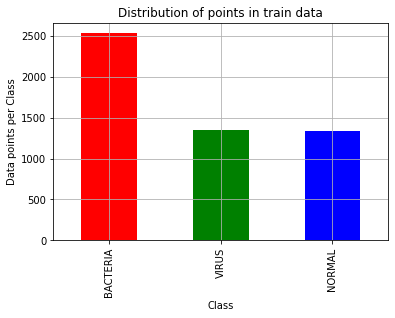

Number of data points in class 1 : 2530 ( 48.505 %)
--------------------------------------------------------------------------------
Number of data points in class 2 : 1345 ( 25.786 %)
--------------------------------------------------------------------------------
Number of data points in class 3 : 1341 ( 25.709 %)
--------------------------------------------------------------------------------


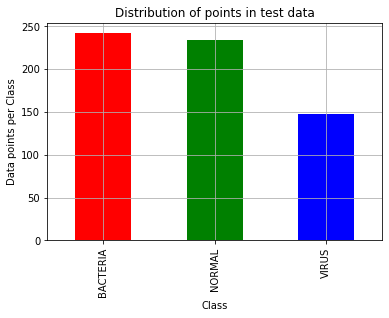

Number of data points in class 1 : 242 ( 38.782 %)
--------------------------------------------------------------------------------
Number of data points in class 2 : 234 ( 37.5 %)
--------------------------------------------------------------------------------
Number of data points in class 3 : 148 ( 23.718 %)
--------------------------------------------------------------------------------


In [ ]:
# assignment from applied course (NLP with Transfer learning)
train_class_distribution = data_df['LABEL'].value_counts()
test_class_distribution = data_test['LABEL'].value_counts()
my_colors = ['r', 'g','b']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of points in train data')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
 print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/data_df.values.shape[0]*100), 3), '%)')
 print('-'*80)
my_colors = ['r', 'g','b']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of points in test data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
 print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/data_test.shape[0]*100), 3), '%)')
 print('-'*80)

##**OBSERVATIONS**

1. The dataset is **imbalanced in such way that number of pneumonia patients chest x ray images are higher**.

2. The data points belonging to class pneumonia-bacteria is more both in train and test dataset.

3. The pneumonia caused by virus is less when compared to pneumonia caused by bacteria. 

4. In the Test data, the number of data points of bacterial and viral pneumonia combined together is higher than the normal lungs becausse to make the model robust to detect pneumonia than normal lungs. Since, the futhermore medical test can give more accurate results but when we predict the pneumonia patients as normal category which may lead to several complications. Hence,the pneumonia affected chest images are highly dominated in dataset.


##**PIE-CHART REPRESENTATION OF DATA-POINTS**

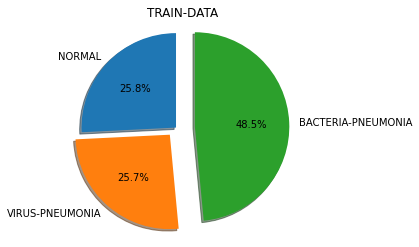

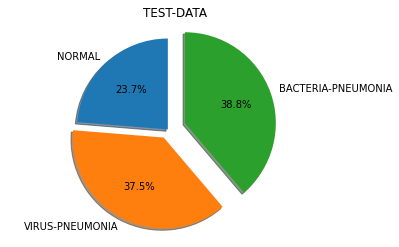

In [ ]:
#obtained from pie chart documnetation in matplotlib
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NORMAL', 'VIRUS-PNEUMONIA', 'BACTERIA-PNEUMONIA'
sizes = [1345,1341,2530]
explode = (0, 0.1,0.20)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('TRAIN-DATA')
plt.show()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NORMAL', 'VIRUS-PNEUMONIA', 'BACTERIA-PNEUMONIA'
sizes = [148,234,242]
explode = (0, 0.1,0.20)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('TEST-DATA')
plt.show()

##**OBSERVATION**

1. In the Train data,the percentage of bacterial pneumonia is represented in green and it has majorly contributed to our dataset.

2. In the Test data, the percetage of bacterial and viral pneumonia combined together is higher than the normal lungs becausse to make the model robust to detect pneumonia than normal lungs. Since, the futhermore medical test can give more accurate results but when we predict the pneumonia patients as normal category which may lead to several complications.Hence, the pneumonia affected chest images are highly dominated in dataset.

In [ ]:
data_df.to_csv('/content/drive/My Drive/image.csv')
data_test.to_csv('/content/drive/My Drive/image_test.csv')

##**PROPERTIES OF IMAGES**

###**PROPERTY OF SINGLE IMAGE**

In [ ]:
#https://towardsdatascience.com/image-data-analysis-using-python-edddfdf128f4
#assignment from applied ai course
pic = cv2.imread('/content/drive/My Drive/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (760, 1152, 3)
Image Hight 760
Image Width 1152
Dimension of Image 3


##**OBSERVATIONS**

1. The shape of images in format (W,H,CHANNELS)

2. The height and width of image is not in multiples of 32 which may cause issues while building the model.



###**ANALYSIS OF ALL IMAGES**

THE BASICIMAGE.EDA IS TAKEN FROM GITHUB REPOSITORY FOR OBTAINING THE PROPERTIES OF IMAGES TO DRAW CERTAIN CONCLUSIONS AND ASSUMPTIONS.
https://github.com/Soongja/basic-image-eda/tree/master/basic_image_eda

A simple multiprocessing EDA tool to check basic information of images under a directory(images are found recursively). This tool was made to quickly check info and prevent mistakes on reading, resizing, and normalizing images as inputs for neural networks. It can be used when first joining an image competition or training CNNs with images!

Notes:
- All images are converted to 3-channel(rgb) images. When images that have various channels are mixed, some results can be misleading.
- uint8 and uint16 data types are supported. If different data types are mixed, error occurs.
- Supported extensions: jpg, jpeg, jpe, png, tif, tiff, bmp, ppm, pbm, pgm, sr, ras, webp


found 5216 images.


  0%|          | 0/5216 [00:00<?, ?it/s]

Using 2 threads. (max:2)



100%|██████████| 5216/5216 [17:09<00:00,  5.07it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  5216

dtype                                    |  uint8
channels                                 |  [1, 3]
extensions                               |  ['jpeg']

min height                               |  127
max height                               |  2663
mean height                              |  968.0747699386503
median height                            |  888

min width                                |  384
max width                                |  2916
mean width                               |  1320.6108128834355
median width                             |  1284

mean height/width ratio                  |  0.7330507674891331
median height/width ratio                |  0.6915887850467289
recommended input size(by mean)          |  [ 968 1320] (h x w, multiples of 8)
recommended input size(by mean)          |  [ 976 1328] (h x w, multiples of 16)


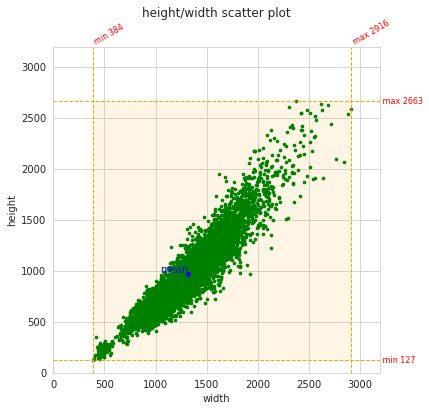

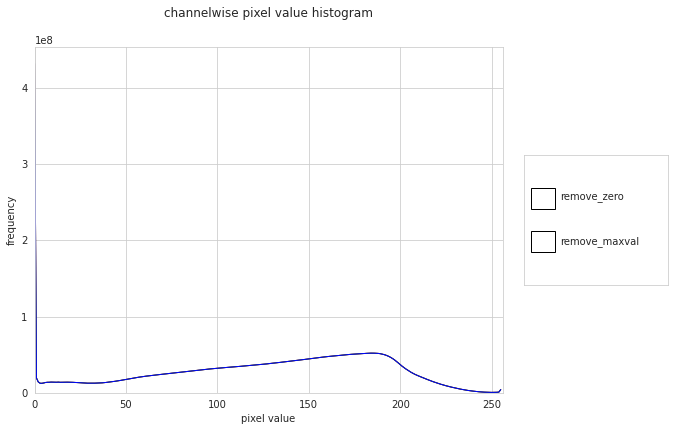

{'channels': [1, 3],
 'dtype': 'uint8',
 'extensions': ['jpeg'],
 'max_h': 2663,
 'max_w': 2916,
 'mean': array([0.48230356, 0.48230356, 0.48230356], dtype=float32),
 'mean_h': 968.0747699386503,
 'mean_hw_ratio': 0.7330507674891331,
 'mean_w': 1320.6108128834355,
 'median_h': 888,
 'median_hw_ratio': 0.6915887850467289,
 'median_w': 1284,
 'min_h': 127,
 'min_w': 384,
 'rec_hw_size_16': array([ 976, 1328]),
 'rec_hw_size_32': array([ 960, 1312]),
 'rec_hw_size_8': array([ 968, 1320]),
 'std': array([0.23767644, 0.23767644, 0.23767644], dtype=float32)}

In [ ]:
extensions = ['jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0
BasicImageEDA.explore('/content/drive/My Drive/train', extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

##**OBSERVATIONS**

1. Since, the individual images of different heights and widths, we dont know which is optimizsed height and width and in-order to find out that we used which is the minimum height and minimum width . The scatter plot will help to help the region of common height and widths shared by images.

2. The height and with suitable for resizing is 968 and 1320 .

3. The channel-wise pixel ration histogram is high around 150-200 which helps us to segment the images for latter usage. 


##**VISUALIZATION OF IMAGES**

Since, we properties of images, we can visualize the images and try to draw conclusion from it.
https://www.glowm.com/atlas_page/atlasid/chestXray.html

##**PNEUMONIA-VIRUS**

(616, 1008, 3)
[[12 12 13 ...  8  8  7]
 [12 12 13 ...  8  7  7]
 [12 13 13 ...  7  7  7]
 ...
 [ 2  3  3 ...  1  1  0]
 [ 2  2  3 ...  1  0  0]
 [ 2  2  3 ...  1  0  0]]


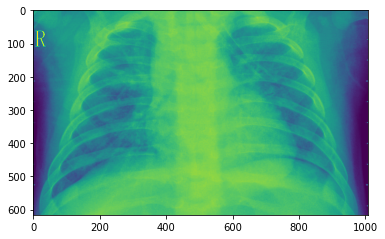

In [ ]:
#assignment from applied ai course
img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
img=cv2.imread('/content/drive/My Drive/train/PNEUMONIA/person1003_virus_1685.jpeg')
img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])

##**PNEUMONIA-BACTERIA**

(760, 1152, 3)
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


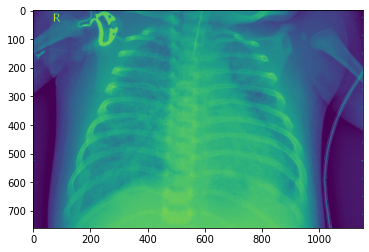

In [ ]:
img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
img=cv2.imread('/content/drive/My Drive/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])

##**NORMAL**

(1434, 1810, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


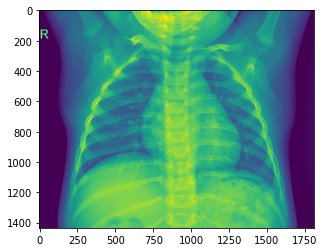

In [ ]:
img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
img=cv2.imread('/content/drive/My Drive/train/NORMAL/IM-0119-0001.jpeg')
img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])

##**OBSERVATIONS**


1. **PNEUMONIA-BACTERIA VS NORMAL**

 The normal image the lung tissues are clearly visible.

  In bacteria image , the tissues are missing and some are not visible which means the tissues are light and not healthy like normal lungs.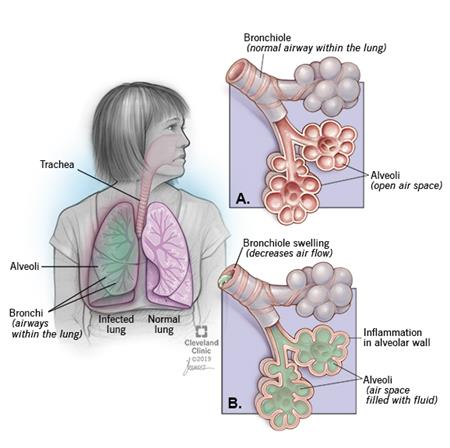
  The picture from, image serach will illustrate our difference between normal and pneumonia bacteria lungs.





2. **PNEMONIA -VIRUS VS NOMAL**

    The normal chest ray left side of lungs and viral left sude of lung is so different and from that image we can find out that viral affects the left part of lung more and the diaphgram is too weak compared to normal lung.


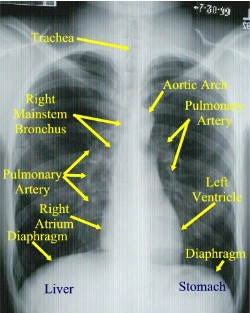

3. **PNEUMONIA-BACTERIA VS VIRAL-PNEUMONIA**

The bacterial pnemonia makes lung tissues more infected than viral.

Bcaterial image has missing of tissues at inside the lung while viral occurs only at the sides of lungs tissues.

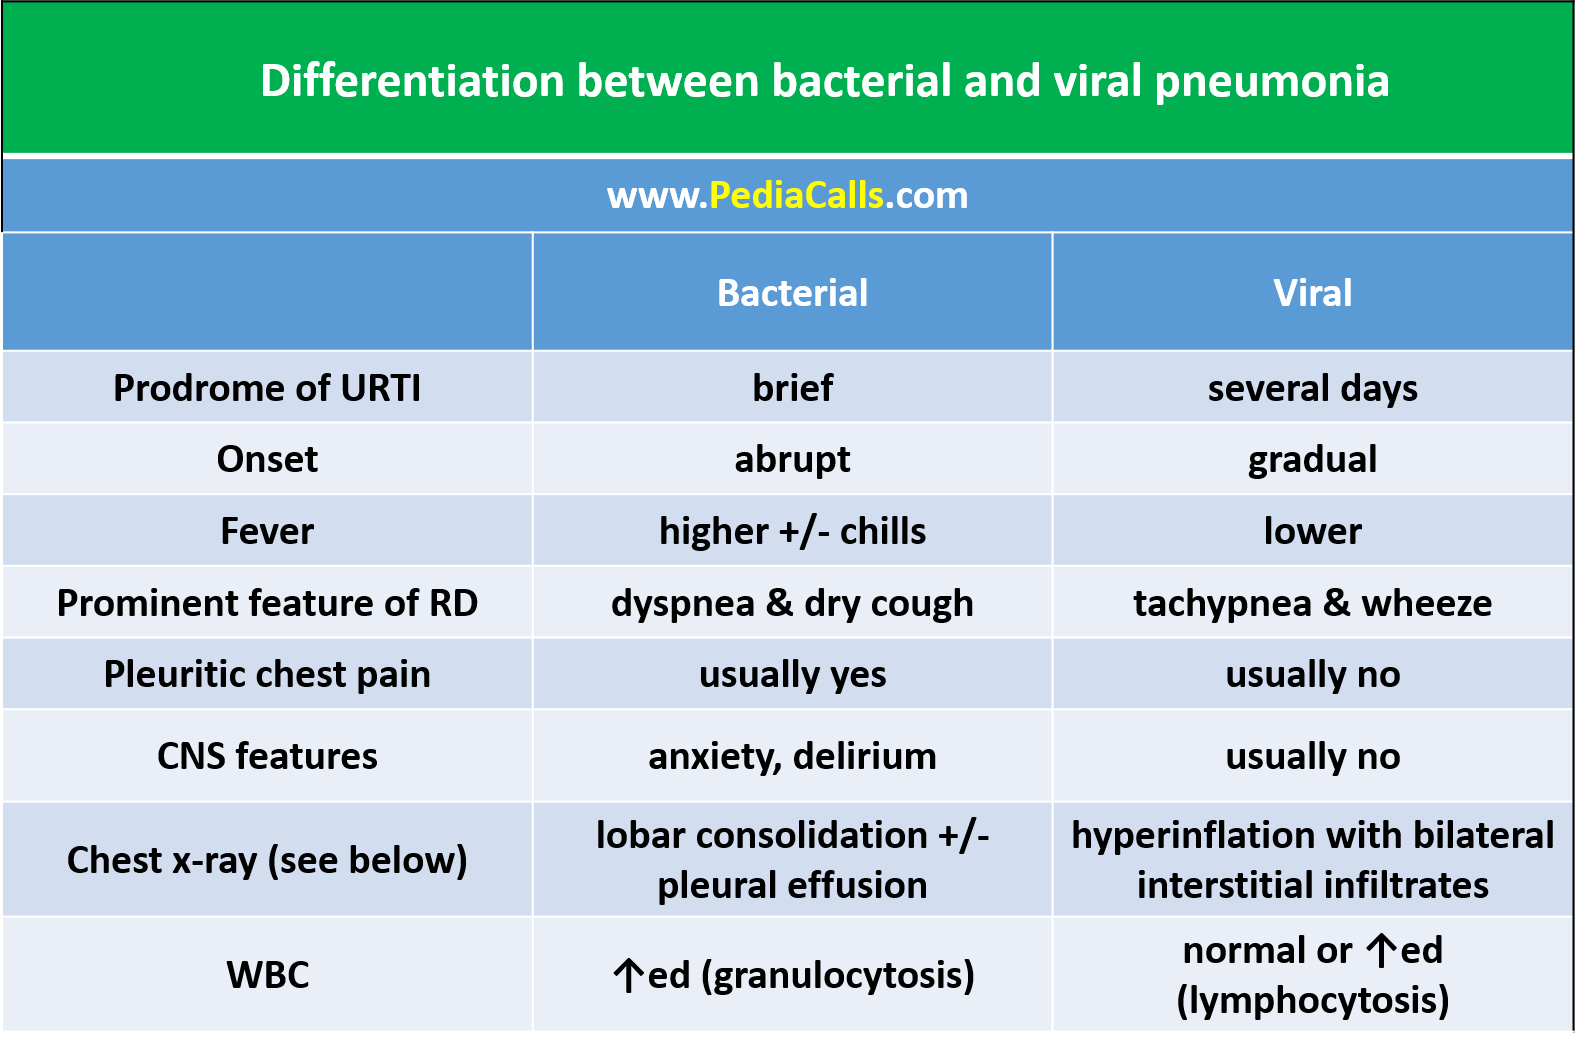

##**HISTOGRAM**

In detail about the intesities of pixels or how tissues are affected by bacteria or virus .

In the field of computer vision, image histograms can be useful tools for thresholding. Because the information contained in the graph is a representation of pixel distribution as a function of tonal variation, image histograms can be analyzed for peaks and/or valleys. This threshold value can then be used for edge detection, image segmentation, and co-occurrence matrices.

In [ ]:
#http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html
#https://matplotlib.org/3.2.1/tutorials/introductory/images.html

##**NORMAL**

In [ ]:
def plot_img_hist(item_files, num_img=6):
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 2, 1)
    img = mpimg.imread(img_path, )
    plt.imshow(img)
    fig1.add_subplot(2, 2, 2)
    plt.hist(img.ravel(),bins=256, fc='k', ec='k')
  
  plt.tight_layout()

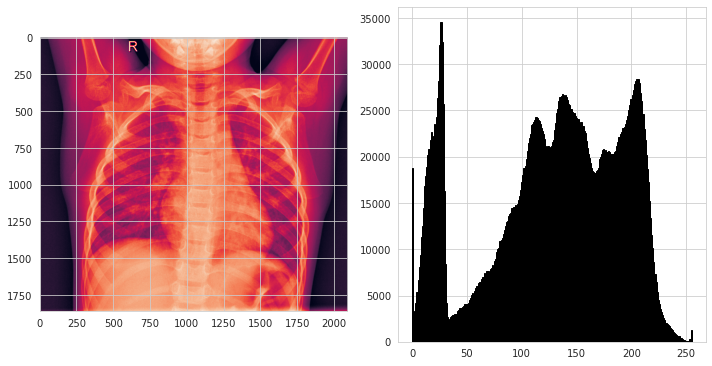

In [ ]:
plot_img_hist(data_df.iloc[:1]['IMAGE'],2)

##**BACTERIA**

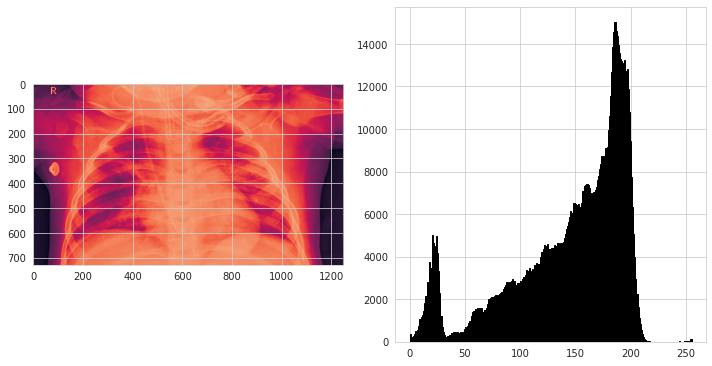

In [ ]:
plot_img_hist(data_df.iloc[5214:5215]['IMAGE'],2)

##**VIRUS**

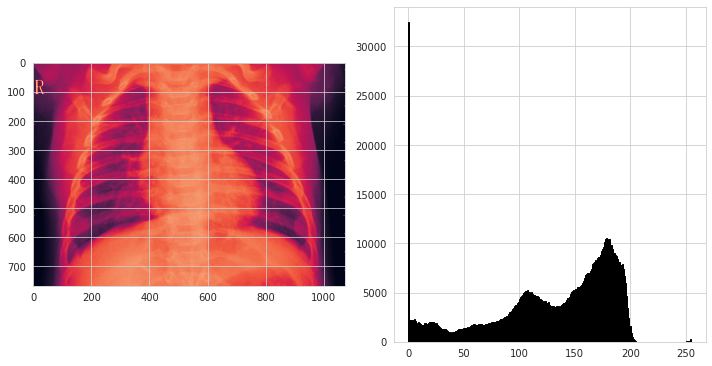

In [ ]:
plot_img_hist(data_df.iloc[1342:1343]['IMAGE'],2)                

**If the histogram values are concentrated toward the left, the image is darker**  

**If they are concentrated toward the right, the image is lighter**

http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html

**PNEUMONIA- BACTERIA VS NORMAL**

The pixels are denser both in right and left part of the lung sin normal chest x ray.

The pixels are steeper in right side graph and there is no pixels ditributed between the range[ 200 250] which indicates that threshold value for image segmentation can be between range 150-200.



**PNEUMONIA-VIRUS VS NORMAL**

The pixels are denser both in right and left part of the lung sin normal chest x ray and peak values are almost same from range 100 to 250.

The pixels are steeper in right side graph and there is no pixels ditributed between the range[ 200 250] which indicates that threshold value for image segmentation can be between range 150-200 and it reaches the peak value at 180(approx)


**PNEUMONIA-VIRUS VS BACTERIAL**

Eventhough, it belongs to same category but the histograms are totally different . The skewness of curve is more in bacteria.



##**CDF**

http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html
https://docs.scipy.org/doc/scipy/reference/ndimage.html
https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.ndimage.measurements.histogram.html
https://projector-video-pdf-converter.datacamp.com/7032/chapter2.pdf

In [ ]:
#https://projector-video-pdf-converter.datacamp.com/7032/chapter2.pdf
def plot_img_hist_ndi(item_files, num_img=6):
  
  #plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    im = imageio.imread(img_path)
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    
    fig1 = plt.figure(idx,figsize=(10, 10))
    fig1.add_subplot(2, 3, 1)
    img = mpimg.imread(img_path, )
    plt.title("No. {}".format(idx))
    plt.imshow(img)
    fig1.add_subplot(2, 3, 2)
    plt.title("Histogram")
    plt.plot(hist)
    fig1.add_subplot(2, 3, 3)
    plt.title("CDF")
    plt.plot(cdf)

  plt.tight_layout()

##**NORMAL**

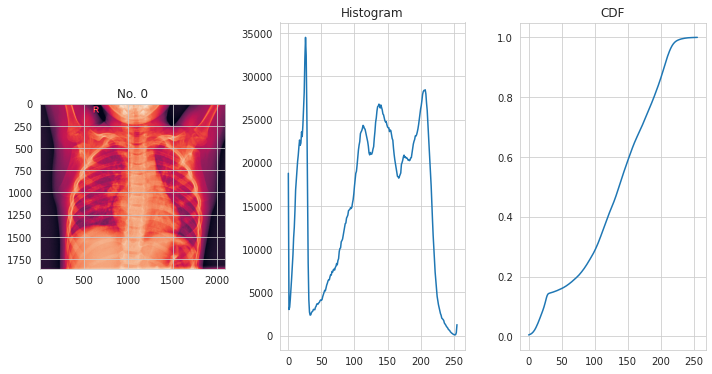

In [ ]:
plot_img_hist_ndi(data_df.iloc[:1]['IMAGE'],2)

##**BACTERIA**

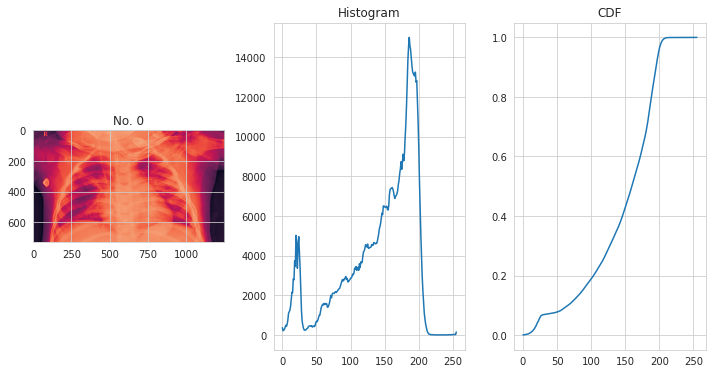

In [ ]:
plot_img_hist_ndi(data_df.iloc[5214:5215]['IMAGE'],2)

##**VIRUS**

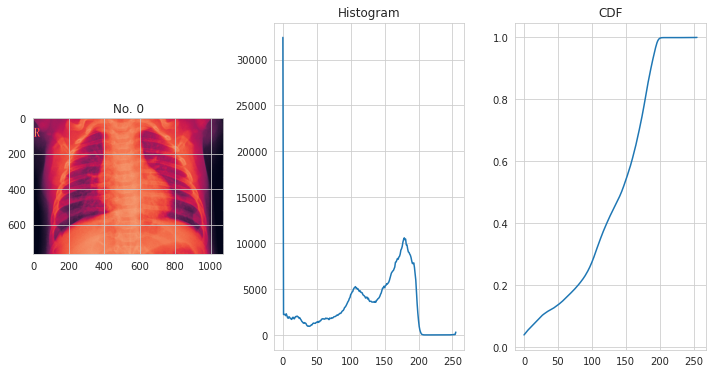

In [ ]:
plot_img_hist_ndi(data_df.iloc[1342:1343]['IMAGE'],2) 

The cdf is not linear in normal and bacterial pneumonia and at the same time histogram occupying the whole range of gray levels and with a cumulative distribution which is going up really smoothly without big steps in both the cases 

The cdf  of viral is almost linear .

**Hence we can conclude that no need for any blending or equalization of the image which may disturb the information extraction.**

In [ ]:
data_df=pd.read_csv('/content/drive/My Drive/image.csv')
data_test=pd.read_csv('/content/drive/My Drive/image_test.csv')

##**DEEP COMPARISON OF IMAGES USING THRESHOLD**

To extract the  structure from this image, we need to segment the image with a high intensity value because the bone is white and other structures are darker. So based on the histogram we have, it seems possible to perform such an operation.

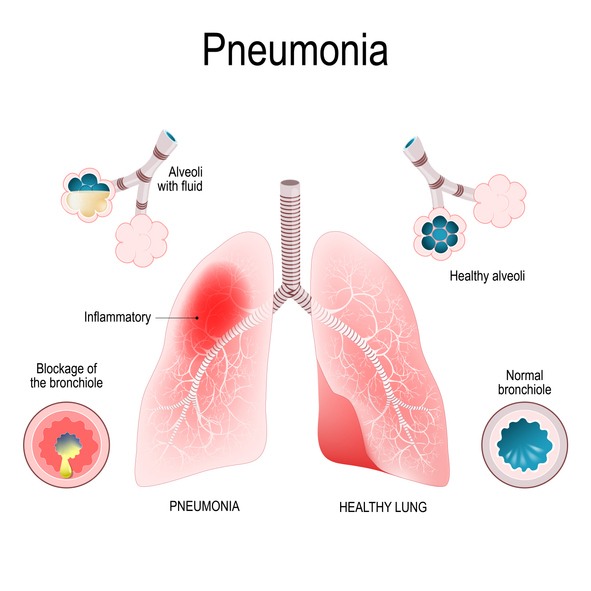

http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html
https://towardsdatascience.com/image-data-analysis-using-python-edddfdf128f4

In [ ]:
import random
total_images_train_pneumonia = os.listdir('/content/drive/My Drive/train/PNEUMONIA/')

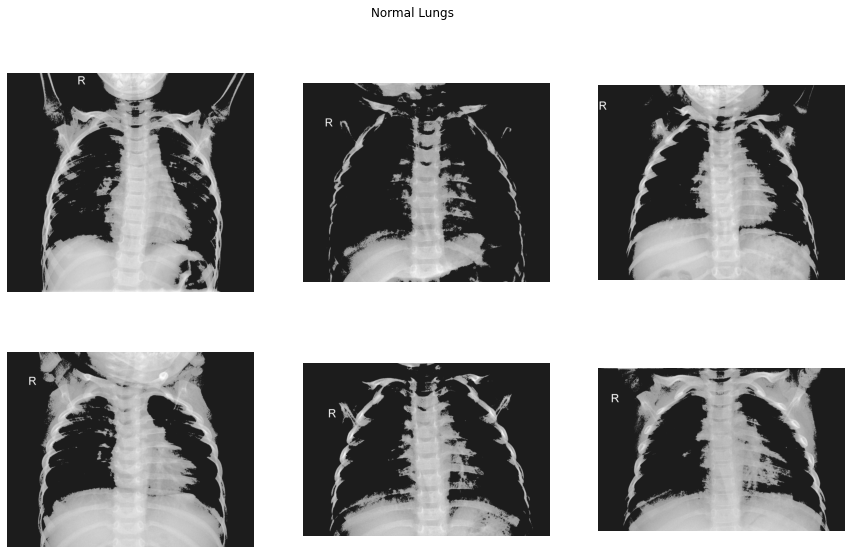

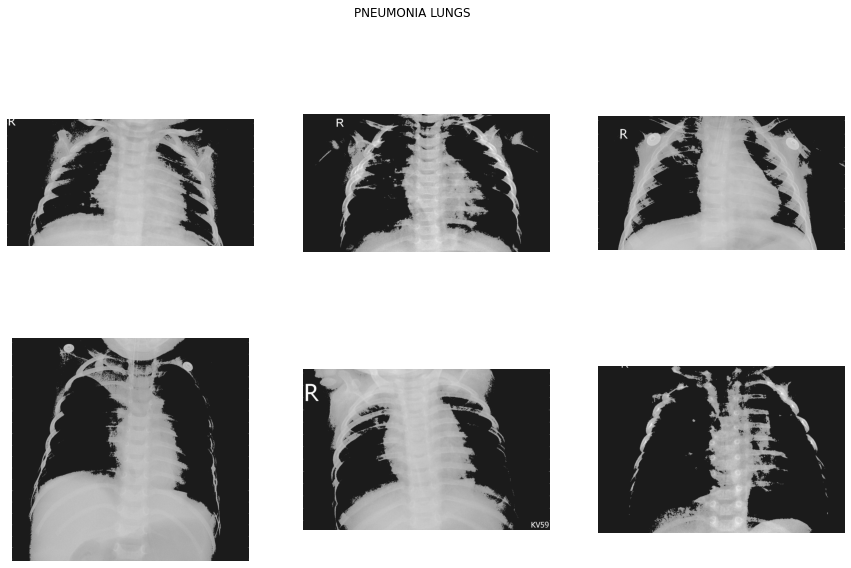

In [ ]:
f,ax = plt.subplots(2,3,figsize=(15,9))
for i in range(0,6):

  pic = cv2.imread(data_df.iloc[i]['IMAGE'])
  red_mask = pic[:,:,0] < 150
  pic[red_mask] = 0
  green_mask = pic[:,:, 1] < 150
  pic[green_mask] = 0
  blue_mask = pic[:, :, 2] < 150
  pic[blue_mask] = 0
  final_mask = np.logical_and(red_mask, green_mask, blue_mask)
  pic[final_mask] = 28
  ax[i//3,i%3].imshow(pic)
  ax[i//3,i%3].axis('off')
f.suptitle('Normal Lungs')
plt.show()
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    pic = cv2.imread('/content/drive/My Drive/train/PNEUMONIA/'+sample_pneumonia[i])
    red_mask = pic[:,:,0] < 150
    pic[red_mask] = 0
    green_mask = pic[:,:, 1] < 150
    pic[green_mask] = 0
    blue_mask = pic[:, :, 2] < 150
    pic[blue_mask] = 0
    final_mask = np.logical_and(red_mask, green_mask, blue_mask)
    pic[final_mask] = 27
    ax[i//3,i%3].imshow(pic,)
    ax[i//3,i%3].axis('off')
f.suptitle('PNEUMONIA LUNGS')
plt.show()


In [ ]:
sample_pneumonia

['person512_virus_1029.jpeg',
 'person1086_bacteria_3026.jpeg',
 'person1314_virus_2266.jpeg',
 'person1496_bacteria_3905.jpeg',
 'person884_virus_1534.jpeg',
 'person549_bacteria_2307.jpeg']

##**NORMAL**

1. As you see the cler image using the threshold technique, we see that the lungs tissues are healthy and it is not missing in most of the pictures.

2. They match the characteristic of above medical image and all the arteries and diaphragm are healthy without any damage

##**PNEUMONIA**
In general , we considering as pneumonia, we have taken one bacteria and one virus images alternatively and analaysed and we see than in bacteria images, the RIGHT BROCHNUS is affected 

In viral pneumonia, the left ventricle and diaphragm are damaged.

Hence, we can study the specific parts of damaged area of lungs thereby we can treat them with proper care.